In [ ]:
import pandas as pd
import numpy as np
import itertools
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [ ]:
def plot_confusion_matrix(cnf_matrix, classesNames, normalize=False,
                          cmap=plt.cm.Blues):
    """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
    """
    np.set_printoptions(precision=2)

    if normalize:
        soma = cnf_matrix.sum(axis=1)[:, np.newaxis]
        cm = cnf_matrix.astype('float') / soma
        title = "Normalized confusion matrix"
    else:
        cm = cnf_matrix
        title = 'Confusion matrix, without normalization'

    print(cm)

    plt.figure()

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classesNames))
    plt.xticks(tick_marks, classesNames, rotation=45)
    plt.yticks(tick_marks, classesNames)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
train = pd.read_csv("./clean_data/clean_train.csv")
test = pd.read_csv("./clean_data/clean_test.csv")
test_class = test.iloc[:,:1]
test = test.iloc[:,1:]
X = train.iloc[:,1:]
y = train['class']
labels = pd.unique(y)

In [ ]:
print(train.columns.values)
train.sample(5)
print(test.columns.values)
test.sample(5)

## Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X,y)
logreg.predict(X)

In [ ]:
y_pred=logreg.predict(X)
len(y_pred)

In [ ]:
print(metrics.accuracy_score(y,y_pred))

## KNN (K=5)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
model = knn.fit(X, y)
y_pred = model.predict(X)
print(metrics.accuracy_score(y,y_pred))


## Evaluation procedure 2 - Train/test split

In [ ]:
trX, trY, tsX, tsY = X, y, test, test_class

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
print(X_train.shape)
print(test.shape)

In [ ]:
#knn = KNeighborsClassifier(n_neighbors=3)
#model = knn.fit(trX, trY)
#predY = model.predict(tsX)
#cnf_matrix = confusion_matrix(tsY, y_pred, labels)
#plot_confusion_matrix(cnf_matrix, labels)

In [ ]:
logreg=LogisticRegression()
logreg.fit(trX, trY)

In [ ]:
y_pred = logreg.predict(tsX)
print(metrics.accuracy_score(tsY, y_pred))

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(trX, trY)
y_pred = knn.predict(tsX)
print(metrics.accuracy_score(tsY, y_pred))

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(trX, trY)
y_pred = knn.predict(tsX)
print(metrics.accuracy_score(tsY, y_pred))

In [ ]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(trX, trY)
    y_pred = knn.predict(tsX)
    scores.append(metrics.accuracy_score(tsY, y_pred))

print(scores)


In [ ]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

## Naive Bayes Classifier

In [ ]:
data = pd.read_csv("./clean_data/clean_train.csv")
data1 = pd.read_csv("./clean_data/clean_test.csv")

In [ ]:
X_train, X_test = data, data1
used_features = X_train.iloc[:,1:]
abc= X_test.iloc[:,1:]
gnb = GaussianNB()
print(  used_features.values)
gnb.fit(
    used_features.values,
    X_train["class"]
)
y_pred = gnb.predict(abc)

# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          X_test.shape[0],
          (X_test["class"] != y_pred).sum(),
          100*(1-(X_test["class"] != y_pred).sum()/X_test.shape[0])
))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn import metrics

data = pd.read_csv("./clean_data/clean_train.csv")

X = data.iloc[:, 1:]
Y = data['class']

scores = []

#green.head()

print("Train set dimensions : {}".format(data.shape))

data.groupby('class').size()

#Visualization of data
#green.groupby('consensus').hist(figsize=(14, 14))

data.isnull().sum()
data.isna().sum()

dataframe = pd.DataFrame(Y)
#Encoding categorical data values 
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 44)


#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Fitting the Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
scores.append(metrics.accuracy_score(Y_test, y_pred))

#95.8 Acuracy

#Fitting K-NN Algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
scores.append(metrics.accuracy_score(Y_test, y_pred))
#95.1 Acuracy

#Fitting SVM
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train) 
y_pred = classifier.predict(X_test)
scores.append(metrics.accuracy_score(Y_test, y_pred))
#97.2 Acuracy

#Fitting K-SVM
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
scores.append(metrics.accuracy_score(Y_test, y_pred))
#96.5 Acuracy

#Fitting Naive_Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
scores.append(metrics.accuracy_score(Y_test, y_pred))
#91.6 Acuracy

#Fitting Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
scores.append(metrics.accuracy_score(Y_test, y_pred))
#95.8 Acuracy

#Fitting Random Forest Classification Algorithm
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
scores.append(metrics.accuracy_score(Y_test, y_pred))
#98.6 Acuracy

#predicting the Test set results
Y_pred = classifier.predict(X_test)

#Creating the confusion Matrix
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(Y_test, Y_pred)
#c = print(cm[0, 0] + cm[1, 1])
print(scores)

In [ ]:

bars = ('Logistic Regression', 'K-NN Algorithm', 'SVM', 'K-SVM', 'Naive_Bayes','Decision Tree','Random Forest')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, scores)
 
# Create names on the x-axis
#plt.xticks(y_pos, bars, color='black')
plt.yticks(color='black')
 
# Rotation of the bars names
plt.xticks(y_pos, bars, rotation=90)
 
# Custom the subplot layout
plt.subplots_adjust(bottom=0.4, top=0.99)

plt.style.use('bmh')
    
# Show graphic
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interp
from sklearn import datasets, neighbors
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import StratifiedKFold

from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
from imblearn.pipeline import make_pipeline

LW = 1
RANDOM_STATE = 200


class DummySampler(object):

    def sample(self, X, y):
        return X, y

    def fit(self, X, y):
        return self

    def fit_sample(self, X, y):
        return self.sample(X, y)
    
cv = StratifiedKFold(n_splits=3)

# Load the dataset

X = data.iloc[:, 1:]
y = data['class']

classifier = ['3NN', neighbors.KNeighborsClassifier(3)]

samplers = [
    ['Standard', DummySampler()],
    ['ADASYN', ADASYN(random_state=RANDOM_STATE)],
    ['ROS', RandomOverSampler(random_state=RANDOM_STATE)],
    ['SMOTE', SMOTE(random_state=7000)],
]

pipelines = [
    ['{}-{}'.format(sampler[0], classifier[0]),
     make_pipeline(sampler[1], classifier[1])]
    for sampler in samplers
]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for name, pipeline in pipelines:
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    for train, test in cv.split(X, y):
        probas_ = pipeline.fit(X[train], y[train]).predict_proba(X[test])
        fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)

    mean_tpr /= cv.get_n_splits(X, y)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, linestyle='--',
             label='{} (area = %0.2f)'.format(name) % mean_auc, lw=LW)

plt.plot([0, 1], [0, 1], linestyle='--', lw=LW, color='k',
         label='Luck')

# make nice plotting
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')

plt.legend(loc="lower right")

plt.show()

In [100]:
from sklearn.tree import DecisionTreeClassifier
import graphviz 
from sklearn import tree


dataset = pd.read_csv('./clean_data/clean_train.csv')

X = dataset.iloc[:, 1:]
y = dataset['class']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 44)

tree1 = DecisionTreeClassifier(criterion = 'entropy').fit(X_train,Y_train)

dot_data = tree.export_graphviz(tree1, out_file=None) 
graph = graphviz.Source(dot_data) 
#graph.render("Decision Tree Green") 

prediction = tree1.predict(X_test)

print("The prediction accuracy is: ",tree1.score(X_test,Y_test)*100,"%")

The prediction accuracy is:  98.95833333333334 %


In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
#X, y = make_classification(n_samples=1000, n_features=25, n_informative=3,
#                           n_redundant=2, n_repeated=0, n_classes=8,
#                           n_clusters_per_class=1, random_state=0)

dataset = pd.read_csv('./clean_data/clean_train.csv')

X = dataset.iloc[:, 1:]
y = dataset['class']

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('./clean_data/clean_train.csv')
abc = dataset.iloc[:,51]
print(abc)
X = dataset.iloc[:, :62]
#y = green['consensus']
#print(dataset[60])
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print(("Num Features: %d") % fit.n_features_)
print(("Selected Features: %s") % fit.support_)
print(("Feature Ranking: %s") % fit.ranking_[51])

# dist_to_center_cervix,fit_circle_rate,fit_cervix_hull_rate

Explained Variance: [6.27093226e-01 1.82031585e-01 6.46652516e-02 4.56588397e-02
 3.31007847e-02 1.55036298e-02 1.24188631e-02 7.74702900e-03
 4.10087824e-03 2.53732956e-03 2.05595485e-03 9.43347823e-04
 7.58273322e-04 5.65894678e-04 4.06889755e-04 2.32928139e-04]
[[ 6.64722621e-04 -6.50460557e-07  2.72780060e-04 -5.34419147e-04
  -9.92697813e-05 -4.64930693e-05 -1.04948473e-04 -2.40396559e-04
  -4.44183214e-05 -4.47714493e-05 -2.74176279e-05 -1.33110261e-05
  -1.57608889e-04 -5.54357387e-05 -6.25212481e-05 -2.44693581e-01
  -6.43973829e-02 -1.80296198e-01 -3.09090964e-01 -3.17404808e-01
  -7.81057441e-02 -2.39299064e-01 -3.95510552e-01 -5.89953241e-02
  -2.38420626e-02 -3.51532615e-02 -8.28373867e-02 -1.57588980e-01
  -9.17824262e-02 -6.58065536e-02 -2.49371406e-01 -2.03809817e-01
  -1.08587796e-01 -9.52220204e-02 -3.12397613e-01 -2.54504291e-02
  -3.98542589e-02  1.44038298e-02 -6.53046881e-02 -2.51301484e-03
  -1.30755160e-03 -1.05883474e-01  3.09232518e-02 -3.17272506e-01
  -7.8197

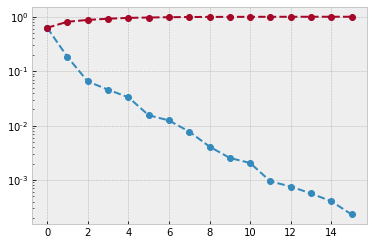

In [75]:
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns

# feature extraction
pca = PCA(n_components=16)
fit = pca.fit(X)
# summarize components
print(("Explained Variance: %s") % fit.explained_variance_ratio_)
print(fit.components_)
plt.semilogy(fit.explained_variance_ratio_, '--o')
plt.semilogy(fit.explained_variance_ratio_.cumsum(), '--o');

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

In [4]:
m = RFECV (RandomForestClassifier(), scoring ='accuracy')

In [20]:
dataset = pd.read_csv('./data/clean_green.csv')
X = dataset.iloc[:, :62]
y = dataset['consensus']
dataset.shape
m.fit(X,y)


C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gonca\Anaconda3\lib\s

C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: F

C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: F

C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: F

C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: F

RFECV(cv='warn',
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
   min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
   verbose=0)

In [14]:
m.predict(X)

array([1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.])

In [15]:
m.score(X,y)

0.9897959183673469

In [18]:
m.transform(X).shape

(98, 50)

In [28]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

print (X.shape)

(98, 62)


In [30]:
m= SelectFromModel(LassoCV())
m.fit(X,y)
m.transform(X).shape

C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\gonca\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase

(98, 7)